# 학습목표
1. 단층 퍼셉트론을 이해하고 구현한다
2. 단층 퍼셉트론으로 분류 문제를 풀어본다 


### 1. 단층퍼셉트론 이해, 구현 

단층 퍼셉트론의 한계를 이해하기 위한 데이터셋 

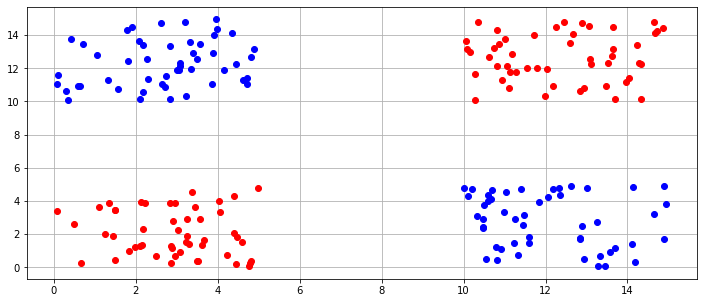

In [52]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))


x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

단층 퍼셉트론으로 위 데이터셋을 분류해보자 

In [53]:
import tensorflow as tf
import tensorflow.keras as K

케라스 모델링 

In [54]:
model = K.models.Sequential([
    K.layers.Dense(1) # 이진분류이므로 출력 노드는 1
    ])

compile 

In [55]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy', # 이진분류의 loss
              metrics=['accuracy'])

fit

In [56]:
model.fit(x, y,
          epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


predict 

테스트 데이터 없이 학습데이터를 예측하므로, 데이터누수가 되어 정답률이 무척 높은 것이 일반적이다 


7/7 [==============================] - 0s 4ms/step


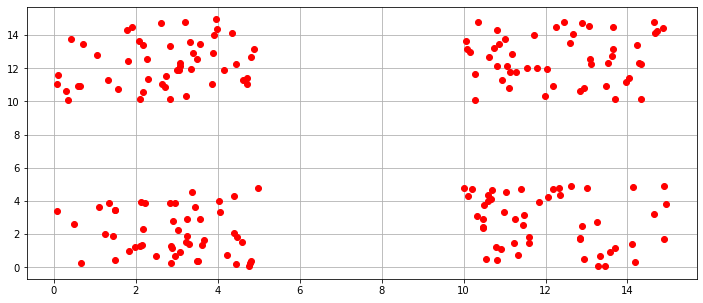

In [57]:
preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

단층 퍼셉트론은 XOR문제를 분류할 수 없다! 

### 2. 단층 퍼셉트론 실전과제 

In [58]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [59]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264


In [60]:
df_label.head(), df_label.tail()

(   0
 0  1
 1  1
 2  1
 3  1
 4  1,       0
 1072  2
 1073  2
 1074  2
 1075  2
 1076  2)

In [61]:
X = df

In [62]:
# y값 0, 1로 라벨링
y = df_label
y[0] = [1 if i==1 else 0 for i in y[0]]
y = y[0]

In [63]:
X

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.75090,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.59640,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.56130,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.59510,...,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.50420,...,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0.25486,0.46359,0.25486,2.0921,2.6000,0.21174,0.17126,2.4837,0.20732,1.05800,...,0.13448,0.50365,0.32636,1.3236,2.5780,0.16718,1.26170,0.96294,0.27555,1.3648
1073,0.27220,0.47416,0.25164,2.1614,2.8015,0.25127,0.18250,2.5127,0.21634,1.08110,...,0.12218,0.51265,0.34416,1.2756,2.5343,0.16959,1.25490,0.98369,0.28321,1.3645
1074,0.22870,0.39518,0.23412,1.7332,2.2209,0.22067,0.16143,1.9897,0.18516,0.88434,...,0.12693,0.63119,0.35811,1.4375,2.5445,0.17969,1.24220,0.97661,0.29084,1.4308
1075,0.22124,0.41289,0.24397,1.8763,2.3841,0.20890,0.17362,2.0860,0.19204,0.92259,...,0.12457,0.62175,0.35228,1.4988,2.6098,0.18504,1.30110,0.98929,0.30670,1.4040


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.copy()
y = df_label.copy()
y[0] = [1 if i==1 else 0 for i in y[0]]
y = y[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
ss = StandardScaler()
X_train_standardized = ss.fit_transform(X_train)
X_test_standardized = ss.transform(X_test)

In [75]:
# 신경망 단층 퍼셉트론 구축
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [76]:
# 컴파일
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
# 훈련
model.fit(X_train, y_train,
          epochs=100,
          verbose=2)

Epoch 1/100
27/27 - 0s - loss: 0.3649 - accuracy: 0.8513 - 472ms/epoch - 17ms/step
Epoch 2/100
27/27 - 0s - loss: 0.3513 - accuracy: 0.8641 - 62ms/epoch - 2ms/step
Epoch 3/100
27/27 - 0s - loss: 0.3485 - accuracy: 0.8676 - 67ms/epoch - 2ms/step
Epoch 4/100
27/27 - 0s - loss: 0.3431 - accuracy: 0.8734 - 53ms/epoch - 2ms/step
Epoch 5/100
27/27 - 0s - loss: 0.3475 - accuracy: 0.8746 - 52ms/epoch - 2ms/step
Epoch 6/100
27/27 - 0s - loss: 0.3575 - accuracy: 0.8537 - 57ms/epoch - 2ms/step
Epoch 7/100
27/27 - 0s - loss: 0.3429 - accuracy: 0.8641 - 50ms/epoch - 2ms/step
Epoch 8/100
27/27 - 0s - loss: 0.3520 - accuracy: 0.8722 - 50ms/epoch - 2ms/step
Epoch 9/100
27/27 - 0s - loss: 0.3458 - accuracy: 0.8699 - 50ms/epoch - 2ms/step
Epoch 10/100
27/27 - 0s - loss: 0.3422 - accuracy: 0.8746 - 48ms/epoch - 2ms/step
Epoch 11/100
27/27 - 0s - loss: 0.3556 - accuracy: 0.8664 - 54ms/epoch - 2ms/step
Epoch 12/100
27/27 - 0s - loss: 0.3482 - accuracy: 0.8746 - 48ms/epoch - 2ms/step
Epoch 13/100
27/27 - 0s